In [37]:
print("===============================")
print("   This implements Example 2")
print("===============================")

   This implements Example 2


In [38]:
import numpy as np
from matplotlib import pyplot as plt

In [39]:
def sample_from_a_e_to_ax(a, bound):
    """
    The probability density function is proportional to
    
        pdf(x)  ~  a * e^(ax)
    
    with the range 0 <= x <= bound. We calculate the cumulative distribution function
    
        cdf(x)  ~  1 - e^(-ax)
    
    to draw the x with respect to the pdf.
    """
    total = 1. - np.exp(-a * bound)
    
    seed = np.random.uniform(0, total)
    return -np.log(1. - seed) / a

In [40]:
def gibbs_sampler(k, bound):
    """
    k: Length of gibbs sampling
    bound: probability distribution parameter
    """
    
    # has to manually give the first y
    y = np.random.uniform(0, bound)
    
    # iterate k times, take turns to sample x and y
    for _ in range(k):
        x = sample_from_a_e_to_ax(y, bound)
        y = sample_from_a_e_to_ax(x, bound)
    
    return x

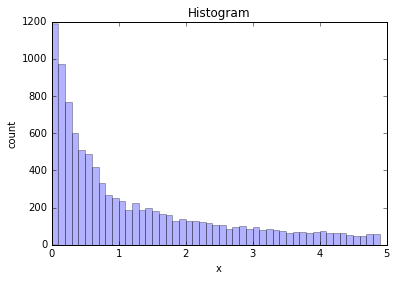

In [41]:
# main procedure
bound = 5.
k = 15
num_samples = 10000
bin_width = 0.1

# do sampling
x_values = [gibbs_sampler(k, bound) for _ in range(num_samples)]

# plot histogram
bins = np.arange(0, bound, bin_width) # fixed bin size

plt.hist(x_values, bins=bins, alpha=0.3)
plt.title('Histogram')
plt.xlabel('x')
plt.ylabel('count')

plt.show()

In [42]:
print("As you can see, the curve is similar to the dashed line in Figure 2")

As you can see, the curve is similar to the dashed line in Figure 2
